<a href="https://colab.research.google.com/github/Mayspe/Trabajo_final_Periodismo_Datos_Taller2/blob/main/Anexo_trabajo_Final_Programaci%C3%B3n_y_Periodismo_de_Datos_Aldao%2C_Brondo%2C_Camacaro%2C_Pereyra%2C_Sierra_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¡HOLA!**


En esta notebook van a encontrar los diferentes bloques de códigos que utilizamos para realizar la extracción de data de la plataforma Twitch y el posterior análisis de texto y sentimiento para la presentación de nuestro producto final.

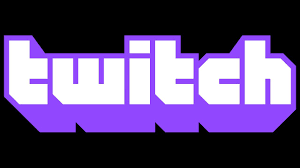

Como el corazón de nuestro producto es el análisis de sentimiento de los streams en Argentina, consideramos que un buen lugar para obetener data y poder establecer diferentes conclusiones eran los chats que se llevaban a cabo en tiempo real. 

En consecuencia, el primer paso para nuestro análisis es obtener esos chats.

#**1. Extracción de data de la plataforma**

In [ ]:
from google.colab import drive #Ejecutamos esta celda para poder conectar nuestro Drive, donde vamos a ir guardando los csv que generemos.
drive.mount('/content/drive')

In [2]:
import pandas as pd #importamos Pandas para trabajar todo lo que recopilamos en formato tabular

In [ ]:
"""Este bloque de código lo trabajamos de forma experimental en clase. El código original puede encontrarse en: https://github.com/xenova/chat-downloader """
!pip install chat-downloader #Instalamos la librería


from chat_downloader import ChatDownloader #Importamos el complemento necesario


url = 'https://www.twitch.tv/videos/1066782556' #Establecemos la url del stream del que queremos obtener los chats
lista = [] #Generamos una lista vacía donde poder ir guardando los datos que se extraen en cada iteración, ya que el código original sólo los mostraba por pantalla.

conv = ChatDownloader().get_chat(url)       # Establecemos los parámetros
for message in conv:                        # Mediante un ciclo por podemos recorrer todos los mensajes de la conversación.
    
    print(conv.format(message))             # Mostramos los mensajes que se levantan en cada iteración
    lista.append(message)                   #Lo agregamos a nuestra lista vacía.

In [ ]:
final = pd.DataFrame(lista) #Convertimos nuestra lista con datos en un data frame.

final.to_csv("/content/drive/MyDrive/Facultad/2021/goncho.csv") #Guardamos nuestro dataframe como .csv dentro de la carpeta especificada de nuestro Drive.

#**2. Carga de csv´s y manipulación de dataframes**

Cargamos todos los csv de chats, y los unimos en un único data frame para hacer un análisis consolidado.

In [11]:
#Importamos los csv´s y los convertimos a dataframes con pandas.

boffe_chats = pd.read_csv("https://raw.githubusercontent.com/Mayspe/Trabajo_final_Periodismo_Datos_Taller2/main/CSV_Chats/boffe_final%20(1).csv")
coscu_chats = pd.read_csv("https://raw.githubusercontent.com/Mayspe/Trabajo_final_Periodismo_Datos_Taller2/main/CSV_Chats/coscu.csv")
goncho_chats= pd.read_csv("https://raw.githubusercontent.com/Mayspe/Trabajo_final_Periodismo_Datos_Taller2/main/CSV_Chats/goncho.csv")
markito_chats= pd.read_csv("https://raw.githubusercontent.com/Mayspe/Trabajo_final_Periodismo_Datos_Taller2/main/CSV_Chats/markito.csv")
oky_chats= pd.read_csv("https://raw.githubusercontent.com/Mayspe/Trabajo_final_Periodismo_Datos_Taller2/main/CSV_Chats/oky.csv")


In [16]:
#Agregamos a cada df una columna con el nombre del streamer correspondiente, para que nos permita en el análisis consolidado poder filtrar por cada nombre en el caso de ser necesario.
boffe = boffe_chats.assign(streamer = "boffe")
coscu = coscu_chats.assign(streamer = "coscu")
goncho = goncho_chats.assign (streamer ="goncho")
markito = markito_chats.assign (streamer = "markito")
oky = oky_chats.assign( streamer = "oky")


In [17]:
#Unimos todos en un mismo df para cuando necesitemos el análisis general
consolidado= pd.concat([boffe, coscu, goncho, markito, oky], axis=0)
consolidado

,Unnamed: 0,message_id,timestamp,time_in_seconds,author,source,state,message,time_text,message_type,emotes,streamer
0,0,89109ef3-d129-4645-a40e-2ecb59fceafe,1623547850679000,1.979,"{'display_name': '28th_loser', 'id': 615095631...",chat,published,y ustedes le creen a gp?,0:01,text_message,NaN,boffe
1,1,327cdf34-eba0-4308-bb29-1ef24f7f911f,1623547850962000,2.262,"{'display_name': 'Lucas_Pichosan05', 'id': 492...",chat,published,VAMOS GP VOS PODES,0:02,text_message,NaN,boffe
2,2,b452928a-a7c8-4cde-bcea-66c90bcf6d5e,1623547851235000,2.535,"{'display_name': 'MateoBellantig32', 'id': 229...",chat,published,OPA,0:02,text_message,NaN,boffe
3,3,26d70bd7-aa6d-493d-92c4-31be8e148a8f,1623547851301000,2.601,"{'display_name': 'franqitogp', 'id': 478981371...",chat,published,OP,0:02,text_message,NaN,boffe
4,4,58e453a3-b26a-4aa9-a48a-43be520d9a96,1623547851394000,2.694,"{'display_name': 'MILO19000', 'id': 496690591,...",chat,published,OPA,0:02,text_message,NaN,boffe
...,...,...,...,...,...,...,...,...,...,...,...,...
5737,5737,e902a6ad-6696-4af6-9afb-04ed65168bfd,1624240179079000,5533.379,"{'display_name': 'oriurbina', 'id': 551050857,...",chat,published,Reaccionando a el streammm,1:32:13,text_message,NaN,oky
5738,5738,40bebdef-f4bd-4539-b0ab-0ba1b94f3286,1624240182073000,5536.373,"{'display_name': 'Luce1625', 'id': 676757090, ...",chat,published,Te amo tuliii,1:32:16,text_message,NaN,oky
5739,5739,8681ce0e-d113-4df2-8403-9e23cb97c9c6,1624240182458000,5536.758,"{'display_name': 'robxal_', 'id': 681947101, '...",chat,published,dou,1:32:16,text_message,NaN,oky
5740,5740,8df1090e-718a-417e-811a-a44b96a588b0,1624240185309000,5539.609,"{'display_name': 'n5rfocusgod', 'id': 48967805...",chat,published,q onda,1:32:19,text_message,NaN,oky


#**3. Limpieza de datos**

Vamos a conservar de nuestro dataframe solo las columnas que nos interesen, limpiarlo, estandarizar los textos y tokenizarlos para ya meternos en el barro :)  

In [23]:
chats = consolidado.drop(["message_id", "timestamp", "time_in_seconds", "author",
                          "source",	"state", "time_text",	"message_type",	"emotes"], axis=1) #Eliminamos las columnas que no vamos a utilizar para este análisis

chats.dropna() #Eliminamos valores nulos

,Unnamed: 0,message,streamer
0,0,y ustedes le creen a gp?,boffe
1,1,VAMOS GP VOS PODES,boffe
2,2,OPA,boffe
3,3,OP,boffe
4,4,OPA,boffe
...,...,...,...
5737,5737,Reaccionando a el streammm,oky
5738,5738,Te amo tuliii,oky
5739,5739,dou,oky
5740,5740,q onda,oky


In [25]:
#Limpiamos el texto
 
#Pasamos todos los chats de la conversación a minúsculas
chats['message'] = chats.message.str.lower()
 
#Removemos la puntuación usando regex.
chats.message = chats.message.str.replace('[^\w\s]','')
 
#Eliminamos los números
chats['message'] = chats['message'].str.replace('\d+', '')
 
#Eliminamos espacios dobles 
chats.message = chats.message.str.replace("\\s+", ' ')
 
#Tokenizammos
chats.message = chats.message.str.split(pat=' ')
 
chats

,Unnamed: 0,message,streamer
0,0,"[y, ustedes, le, creen, a, gp]",boffe
1,1,"[vamos, gp, vos, podes]",boffe
2,2,[opa],boffe
3,3,[op],boffe
4,4,[opa],boffe
...,...,...,...
5737,5737,"[reaccionando, a, el, streammm]",oky
5738,5738,"[te, amo, tuliii]",oky
5739,5739,[dou],oky
5740,5740,"[q, onda]",oky


In [26]:
#vamos a agregar una columna que se llame "token" y separar los tokens que teníamos uno por fila.
chat_toks = chats.explode(column='message')

chat_toks = chat_toks.rename(columns={'message':'token'})
chat_toks

,Unnamed: 0,token,streamer
0,0,y,boffe
0,0,ustedes,boffe
0,0,le,boffe
0,0,creen,boffe
0,0,a,boffe
...,...,...,...
5738,5738,tuliii,oky
5739,5739,dou,oky
5740,5740,q,oky
5740,5740,onda,oky


¡Listas para analizar!

#**4. Análisis de texto**

En este análisis podemos saber en qué stream se dijeron más palabras, cuál fue la más usada, cuál fue el streamer que contó en su chat con más palabras diferentes y algunas magias más. :)

In [28]:
#¿En el stream de quién se dijeron más palabras?
chats_palabras = chat_toks.groupby(by='streamer')["token"].count()
mas_palabras =chats_palabras.sort_values(ascending=False).reset_index(name="token")
mas_palabras

,streamer,token
0,markito,28924
1,boffe,28421
2,coscu,23815
3,oky,16566
4,goncho,1495


In [30]:
"""Vemos que en el chat de markito, fue donde se dijeron más palabras. 
Sin embargo este dato no nos es trascendente porque depende de la duración del stream, pero vemos algo que si nos puede interesar"""

#¿En qué stream se dijeron más palabras diferentes"
chat_toks.groupby(by='streamer')['token'].nunique().sort_values(ascending=False)

streamer
coscu      5421
markito    5202
boffe      5022
oky        4379
goncho      559
Name: token, dtype: int64

In [62]:
#Vamos a tener que limpiar un poco más nuestros tokens, para eso vamos a cargar la librería NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
stop_words = list(stopwords.words('spanish'))
 
# Agregamos las palabras que nos parecen necesario sacar tambien
stop_words.extend(("multimedia", "omitido", "q","jajjaja", "jajajajajajja", "", " ", "si", "va",
                   "ahora", "voy", "jj", "día", "mensajes", "extremo", "cifrados", "llamadas", "imagen", "audio", "omitida," "sticker", "a", "abandonadas", "único", "únicos", "hola", "va", "gp","coscu", "tuenti", "boffe", "vengan", "fbcatch", "markito", "whatsapp", 
                   "boffeva", "boffestonks", "gg", "lucas", "ustedes", "creen", "vamos", "podes", "vos", "bofferaro", "boffesolido", "dale", "pasa", "quiero", "boffepla", "oky","markitos",
                   "instagramcommknoficial", "genio", "gordo","burrucyaga", "boffeletsgo", "genioooo", "llorar", "zeko", "chat", "ttatatatatatat", "goooooooll", "siempre", "tocar", "mundial", "cósmico", 
                   "jajaja", "notlikethis","mas", "stream", "jajajaja", "k", "hoy", "bien", "re", "xd", "amigo", "amo", "sos", "v", "bueno", "onda", "mkn", "biblethump", "hace"))
 
print(stop_words[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [70]:
#Quitamos las stop words de nuestros tokens
chat_toks = chat_toks[~(chat_toks["token"].isin(stop_words))]
chat_toks

,Unnamed: 0,token,streamer
2,2,opa,boffe
3,3,op,boffe
4,4,opa,boffe
5,5,opa,boffe
6,6,joda,boffe
...,...,...,...
5737,5737,reaccionando,oky
5737,5737,streammm,oky
5738,5738,tuliii,oky
5739,5739,dou,oky


In [71]:
#Podemos averiguar el top de palabras consolidado

top_palabras= chat_toks[['token']].groupby(['token'
])['token'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(20)
top_palabras

,token,count
10582,pa,486
4550,f,368
2592,clash,220
8686,lul,204
13152,squid,187
9844,nazi,135
5171,god,128
2570,clap,123
13930,tuli,115
7795,juga,113


In [72]:
#O también identificarlas por Streamer

top_palabras_por_streamer = chat_toks[['token','streamer']].groupby(['token', 'streamer'
])['token'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(20)
top_palabras_por_streamer

,token,streamer,count
13442,pa,coscu,296
3308,clash,markito,218
16851,squid,markito,155
5868,f,markito,128
12428,nazi,coscu,115
17900,tuli,oky,115
1870,barrilete,markito,110
13444,pa,markito,109
16540,sirmpre,markito,108
11227,maradonaa,markito,108


# Acá aparece algo que nos llama la atención. **¿Nazi es una topword?**

Ya tenemos algo que nos va a servir como eje de nuestro producto. Buenardo, ¿no? (?)


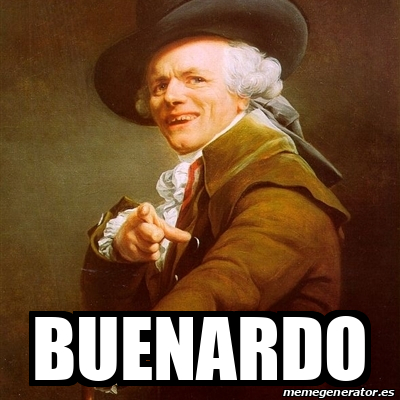

In [73]:
#Ahora vamos a hacer  una matriz de distancia similitud coseno. Para ver qué espectadores de cada streamer hablabn más parecido entre ellos. 

chat_pivot = chat_toks.groupby(["streamer","token"])["token"] \
.agg(["count"]).reset_index() \
.pivot(index = "token" , columns="streamer", values= "count")
chat_pivot.columns.name = None
chat_pivot

from scipy.spatial.distance import cosine
 
def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia
 
correlation = chat_pivot.corr(method=similitud_coseno)
correlation

,boffe,coscu,goncho,markito,oky
boffe,1.000000,0.307586,0.325016,0.349554,0.457439
coscu,0.307586,1.000000,0.306468,0.501757,0.481042
goncho,0.325016,0.306468,1.000000,0.655801,0.650152
markito,0.349554,0.501757,0.655801,1.000000,0.529345
oky,0.457439,0.481042,0.650152,0.529345,1.000000


**Los espectadores de todos** hablan muy parecido a los de **Oky**.

In [74]:
#Podemos graficarlo así:
import plotly.express as px
fig = px.imshow(correlation)
fig.show()

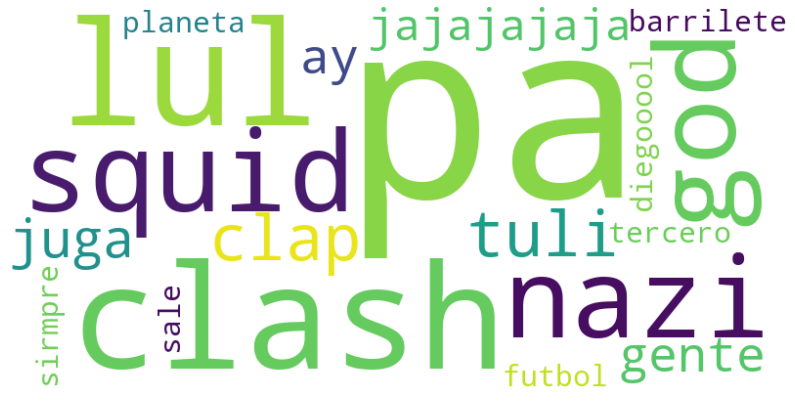

In [75]:
#Una forma de saber las palabras más destacadas es armar una nube de palabras del top consolidado
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(review for review in top_palabras.token.astype(str))
stopwords = set(STOPWORDS)
stopwords.update(stop_words)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
 
# graficamos la nube
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

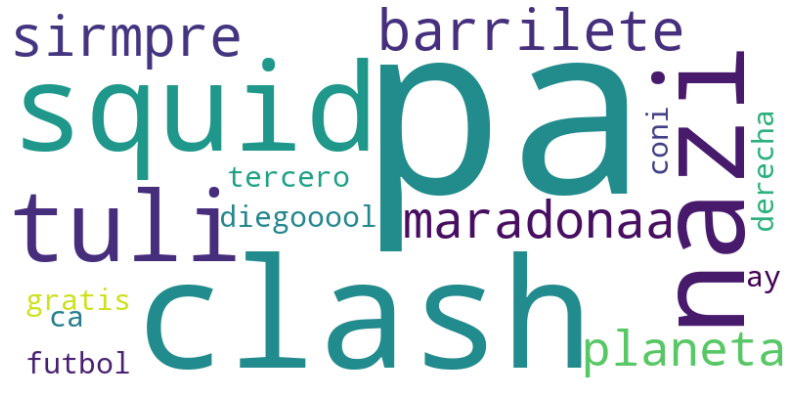

In [76]:
#Una forma de saber las palabras más destacadas es armar una nube de palabras del top por streamer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = " ".join(review for review in top_palabras_por_streamer.token.astype(str))
stopwords = set(STOPWORDS)
stopwords.update(stop_words)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
 
# graficamos la nube
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#**5. Análisis de sentimiento**

En esta instancia vamos a analizar cuán negativos y cuán positivos resultaron estos chats

In [78]:
#Vamos a hacer análisis con un lexicon.
lexicon = pd.read_csv(
            'https://raw.githubusercontent.com/jboscomendoza/lexicos-nrc-afinn/master/lexico_afinn.csv'
          )
lexicon.head()

,palabra,puntuacion,word
0,culpa,-2,blame
1,culpar,-2,blames
2,aborda,1,aboard
3,abordo,1,aboard
4,abandona,-2,abandons


In [82]:
#Calculamos el sentimiento promedio para cada streamer
chats_sentimientos= pd.merge(
                            left     = chat_toks,
                            right    = lexicon,
                            left_on  = "token", 
                            right_on = "palabra",
                            how      = "inner"
                      )
chats_sentimientos = chats_sentimientos.drop(columns = "palabra")
chats_sentimientos

,Unnamed: 0,token,streamer,puntuacion,word
0,39,mejor,boffe,3,best
1,124,mejor,boffe,3,best
2,734,mejor,boffe,3,best
3,778,mejor,boffe,3,best
4,870,mejor,boffe,3,best
...,...,...,...,...,...
3616,4722,abuso,oky,-3,abuse
3617,4927,brilla,oky,1,brightness
3618,5487,tímido,oky,-2,diffident
3619,5487,tímido,oky,-1,shy


In [86]:
#sumamos los sentimientos por usuario
chats_sentimientos= chats_sentimientos[["streamer", "puntuacion"]] \
                      .groupby(["streamer"])\
                      .mean().reset_index()
chats_sentimientos

,streamer,puntuacion
0,boffe,0.320432
1,coscu,0.314563
2,goncho,-1.035714
3,markito,-0.334083
4,oky,0.134122


Los espectadores de Goncho no estarían teniendo un buen día :/ 

In [87]:
#Vamos a ver el promedio general de sentimmiento de los chats :)

chats_sentimientos.mean()

puntuacion   -0.120136
dtype: float64

Nada mal para un año y medio en pandemia, ¿no?

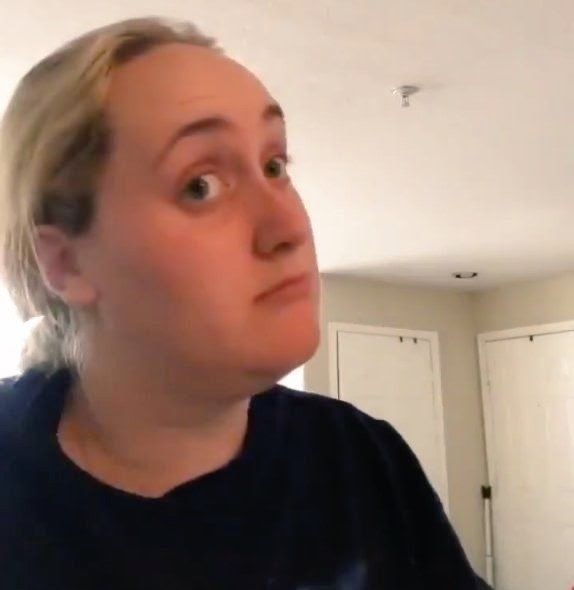

¡Ahora a graficar estos sentimientos!

In [104]:
pip install mplcyberpunk #No podemos soltar esta librería :)

In [106]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import mplcyberpunk
import matplotlib.ticker as plticker

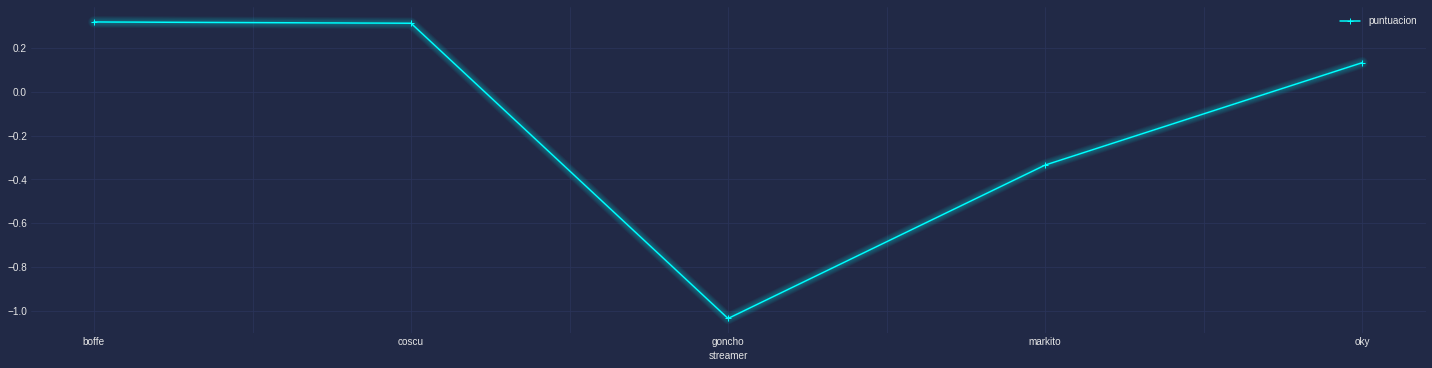

In [108]:
plt.style.use("cyberpunk")
plt= chats_sentimientos.plot(x='streamer',y='puntuacion', marker="+", colormap= "cool", figsize=(25, 6))
plt.tick_params(axis="both")
mplcyberpunk.make_lines_glow()

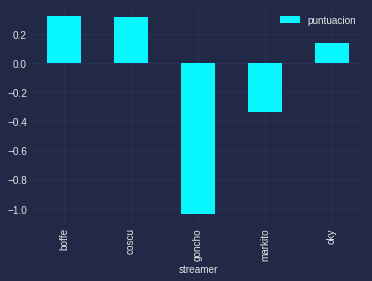

In [112]:
plt.style.use("cyberpunk")
plt= chats_sentimientos.plot(kind ="bar", x='streamer',y='puntuacion')
plt.tick_params(axis="both")
mplcyberpunk.make_lines_glow()

Los espectadores de ya sabemos quién están en un pozo depresivo.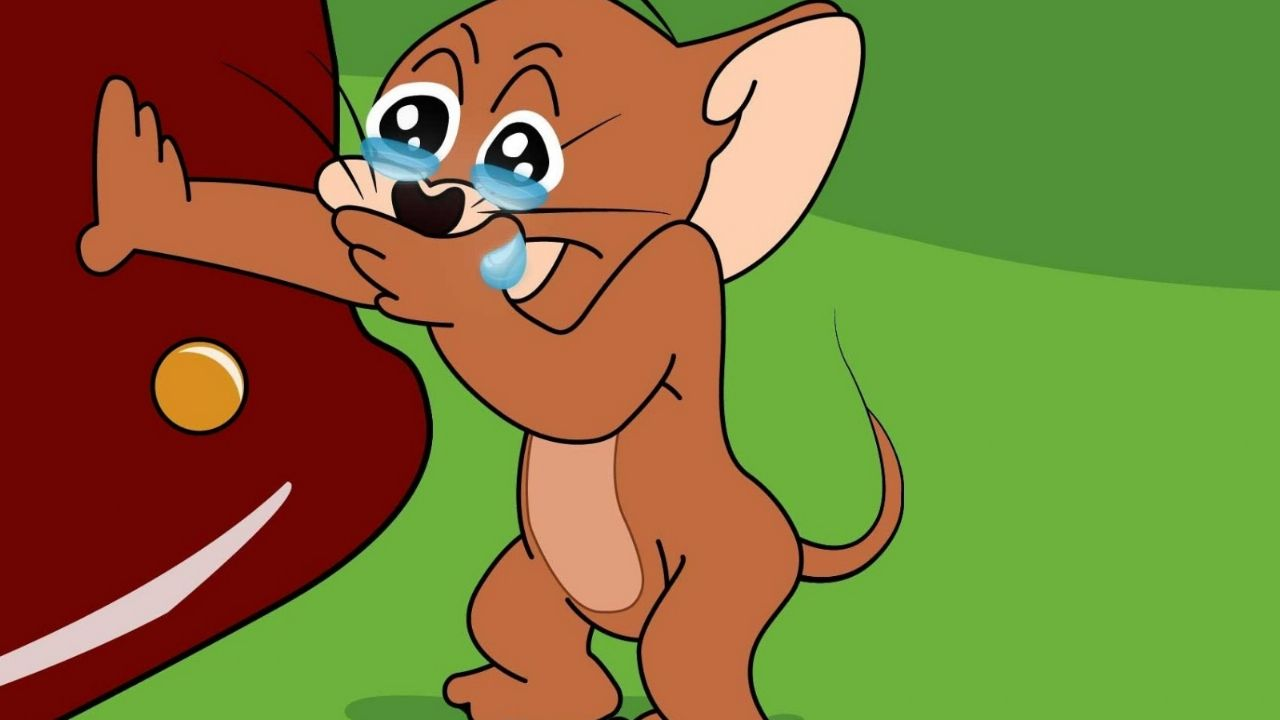